I began by downloading the dataset from Kaggle and uploading it to Jupyter. The code seemed to run best when I stored the csv file in the same folder as my Python notebook. Below is the set up for packages we will use later.

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing & reading csvs
import matplotlib.pyplot as plt #plotting
import seaborn as sns #statistical graphs

Here I have read the csv file and checked it has done so correctly by outputting the first 5 rows.

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Let us do a quick summary of the data and see how many rows and columns there are. In addition the info() function gives us a concise dataframe summary.

In [3]:
data.shape

(96453, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


We can then check for missing data entries.

In [5]:
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

The heatmap below shows the pairwise correlation between all of the columns in the dataframe. The value of correlation falls in the interval [-1,1]. Strong correlation between two random variables or bivariate data does not necessarily imply a causal relationship.

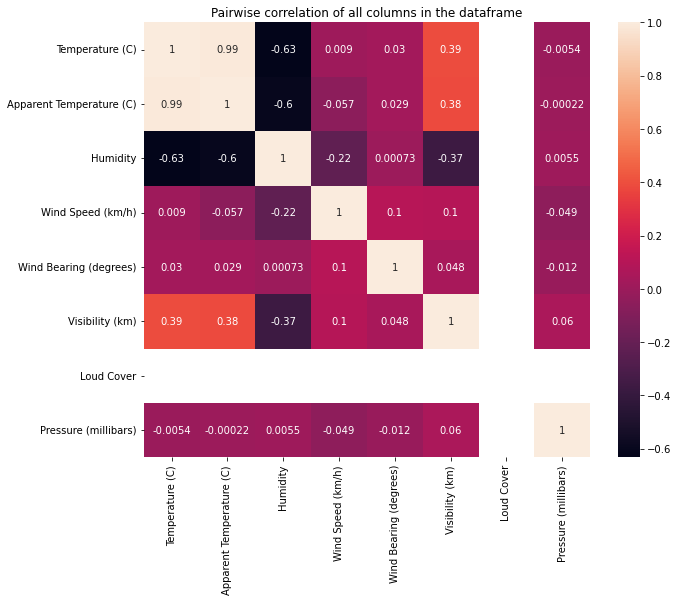

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data= data.corr(), annot=True)
plt.title("Pairwise correlation of all columns in the dataframe")
plt.savefig('plot6.png', dpi=300, bbox_inches='tight')
plt.show()

Before continuing with some more interesting analysis, we have to format the date into the correct format. The .to_datetime() function converts a scalar, array-like dataframe to a pandas datetime object. I had a couple issues with a Key Error in pandas but managed to remedy the mistake by clearing all outputs and re-running all cells.

In [7]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data = data.set_index("Formatted Date")
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [8]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


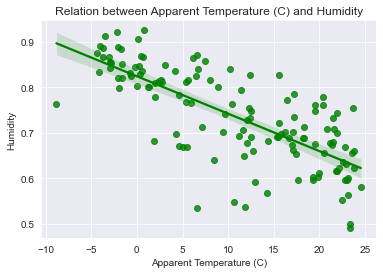

In [9]:
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="g")
plt.title("Relation between Apparent Temperature (C) and Humidity")
# save the figure
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

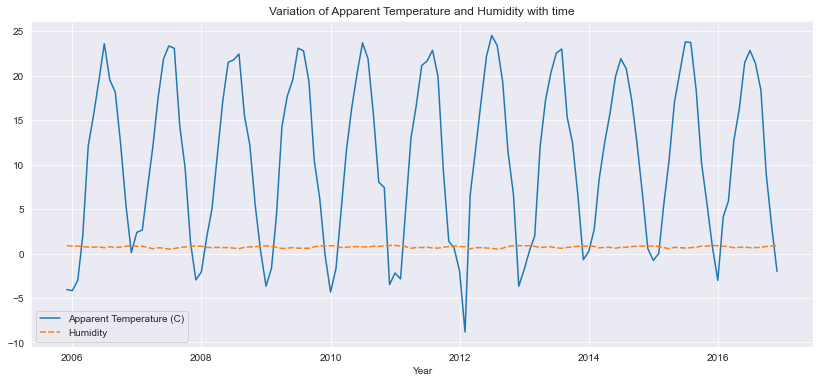

In [10]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Apparent Temperature and Humidity with time")
# save the figure
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')
plt.show()

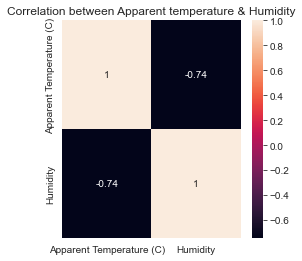

In [11]:
# Pair plot for correlation of Apparent temperature & Humidity
sns.set_style("darkgrid")
plt.figure(figsize=(4,4))
plt.title("Correlation between Apparent temperature & Humidity")
sns.heatmap(data= df_monthly_mean.corr(), annot=True)
# save the figure
plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()